In [22]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.8 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_960/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv("./data/workingData/numSamples.csv")


In [7]:
df = df.rename(columns={'Row Labels': 'users', 'Count of Value': 'm_l_values'})
df.info


<bound method DataFrame.info of           users  m_l_values
0    GJ05BX3044           1
1    GJ05BX3214           1
2    GJ05BX3258           1
3    GJ05BX3311           1
4    GJ05CU0549           1
..          ...         ...
212  GJ05BZ2888         315
213  GJ05BX1679         322
214  GJ05BX2283         322
215  GJ05BZ2876         342
216  GJ05BZ4447         417

[217 rows x 2 columns]>

In [8]:
eps = np.arange(0.001, 2, 0.001)
# print(eps)
# eps = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
# eps = [0.001, 0.002, 0.003, 0.004, 0.005, 0.1, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 3, 4, 5, 10, 20, 50, 100]

In [9]:
m_median = np.median(df['m_l_values'])
m_min = np.min(df['m_l_values'])
m_max = np.max(df['m_l_values'])
m_values = np.arange(m_min, m_max+1, 1)
m_l_values = df['m_l_values'].to_numpy()

print(np.sum(m_l_values))
print(m_median, m_min, m_max)
print(m_values)
print(m_l_values)

17166
46.0 1 417
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 2

In [10]:
# eps = [0.001]
error = []
m_tracker = []
# m_l_tracker = []
epsilon_tracker = []
i = 0
j = 0
current_error = []
min_index_current_error = []

for epsilon in eps:
    current_error = []
    for m in m_values:
        m_array = np.full(len(m_l_values), m)
        min_m_ml = np.minimum(m_array, m_l_values)
        gamma_l = np.sum(min_m_ml)
        current_error.append((1 - ((gamma_l)/np.sum(m_l_values))) + ((np.sqrt(2)*m)/(epsilon*(gamma_l))))
        # min_calc = current_error
        # if current_error < min_calc:
        #     min_calc = current_error
        #     min_index = m
        # print(min_calc)
        m_tracker.append(m)
        epsilon_tracker.append(epsilon)
    # print(min_index)
    error.append(np.min(current_error))
    # print(error)
    min_index_current_error.append((np.argmin(current_error)) + m_min)
print(min_index_current_error)
plot_y_value = min_index_current_error

# print(len(error))
# print(np.shape(error))
# print(error)
# print(min_index_current_error)
# min_value = np.min(error)
# min_index = np.argmin(error)
# print("Minimum error:", min_value)
# print("Minimum error index:", min_index_current_error)
# print("Corresponding m:", m_tracker[min_index_current_error])
# print("Corresponding epsilon:", epsilon_tracker[min_index_current_error])

[1, 1, 1, 1, 22, 29, 38, 40, 43, 65, 66, 68, 74, 78, 82, 87, 91, 114, 126, 127, 128, 132, 133, 133, 135, 138, 147, 147, 148, 158, 160, 160, 169, 169, 170, 173, 177, 177, 183, 185, 185, 187, 187, 189, 189, 189, 192, 192, 196, 196, 196, 197, 197, 208, 208, 208, 210, 210, 210, 220, 220, 220, 225, 225, 225, 225, 235, 235, 235, 235, 244, 244, 244, 244, 244, 244, 245, 245, 245, 245, 245, 245, 245, 247, 247, 247, 247, 247, 247, 247, 248, 248, 248, 248, 248, 248, 248, 248, 248, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 257, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 264, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 275, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 284, 

In [1]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
# pio.renderers.default = "notebook"
import matplotlib.pyplot as plt

In [28]:
def get_plots(
    x_axis_data,
    x_label,
    y_axis_data,
    y_label,
    title,
    legend,
    y_axis_tick=0.5,
    legend_prefix="",
):    
    fig = go.Figure()
    maks = [
        "hourglass",
        "circle",
        "square",
        "star",
        "square-open",
        "x",
        "bowtie",
        "circle-open",
        "x-open",
    ]
    mp_maks = ["o", "^", "s", "*", "x", "P"]
    line_styles = [
        "-",
        "-.",
        "--",
        ":",
        "-",
        "--",
        ":",
        "-.",
        "-",
        "--",
        ":",
        "-.",
        "-",
        "--",
        ":",
        "-.",
    ]

    fig.update_layout(
        # scene = dict(
        #     xaxis_title=x_label,
        #     yaxis_title=y_label,
        # ),
        xaxis_title=x_label,
        yaxis_title=y_label
    )

    # fsize = 100
    # tsize = 14

    # tdir = "in"

    # major = 5.0
    # minor = 3.0

    # style = "default"

    # plt.style.use(style)
    # plt.rcParams["font.size"] = fsize
    # plt.rcParams["legend.fontsize"] = 'x-large'
    # plt.rcParams["xtick.direction"] = tdir
    # plt.rcParams["ytick.direction"] = tdir
    # plt.rcParams["xtick.major.size"] = major
    # plt.rcParams["xtick.minor.size"] = minor
    # plt.rcParams["ytick.major.size"] = major
    # plt.rcParams["ytick.minor.size"] = minor
    # plt.rcParams["text.usetex"] = True
    

    # Create subplots
#     ]

    #creating an array of y values 
    y = []
    # scaleFactorSynthetic = [0.1579, 0.1579, 0.1579, 0.1579, 0.1579]
    # scaleFactorNS = [1.579, 1.579, 1.579, 1.579, 1.579]
    # baselineMAENS = np.divide(scaleFactorNS, x_axis_data)
    # baselineMAESynthetic = np.divide(scaleFactorSynthetic,x_axis_data)
    # print(baselineMAE)
    for i in y_axis_data:
        y.append(i)
    # print(y)
    # print(x_axis_data)

    # Add traces to the first subplot (RMSE)
    fig.add_trace(go.Scatter(x=x_axis_data, 
                             y=y[0], 
                             mode='lines', 
                             name=r'$\mathrm{B2}$',
                             marker_color = 'green',
                            #  showlegend=False,
                             marker_symbol=maks[1]))

    # Update subplot layout

    fig.update_xaxes(title_font_size=18, title_text=r'$\Huge{\varepsilon}$', title_standoff = 18, automargin = False, type = 'log')
    fig.update_yaxes(title_font_size=18, title_text=r'$\Large{m^{\varepsilon}}$', title_standoff = 18, automargin = False, tickvals = np.arange(1,418,32))

    # Update the title of the entire figure
    fig.update_layout(legend=dict(yanchor="top", y=1, xanchor="right", x=1, font_size = 16,valign = 'middle', entrywidth = 0),
                      height=700, 
                      width=700,
                      margin=dict(r=20, t=20))

    # fig.show()
    return fig

[[<matplotlib.axis.XTick at 0x7f1109315ff0>,

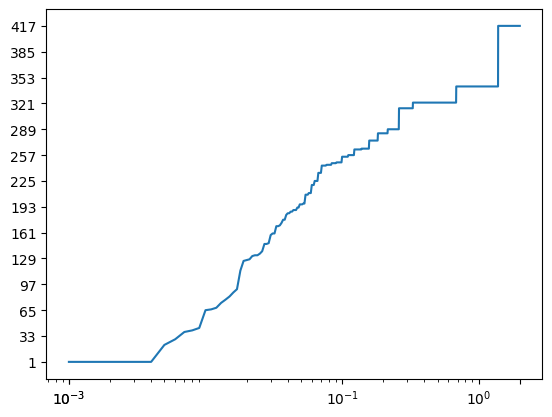

In [10]:

plot = sns.lineplot(x = eps, y=plot_y_value)
plot.set(yticks=np.arange(1,418,32))
plot.set(xscale='log')
plot.set(xticks=[0.001, 0.001, 0.1, 1, 2])

